# Question 1
Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points). Be sure to review the readings before you start on this assignment. Calculate the sum of least square error for each different values of 'k'. Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points) . Finally plot the optimal clusters with their centroids along with a brief explanation (50 points). Comment your code as needed.

In [4]:
!pip install ucimlrepo


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
diabetes_data = diabetes_130_us_hospitals_for_years_1999_2008.data.features 

# metadata 
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata) 
  
# variable information 
print(diabetes_130_us_hospitals_for_years_1999_2008.variables) 

{'uci_id': 296, 'name': 'Diabetes 130-US hospitals for years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

C:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [24]:
# Checking the data types and missing values in the dataset
data_info = diabetes_data.info()
data_info

# Selecting numerical columns for clustering
numerical_cols = diabetes_data.select_dtypes(include=['int64', 'float64']).columns

# Displaying numerical columns
numerical_cols, len(numerical_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                61510 non-null   object
 9   medical_specialty         51817 non-null   object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

(Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
        'time_in_hospital', 'num_lab_procedures', 'num_procedures',
        'num_medications', 'number_outpatient', 'number_emergency',
        'number_inpatient', 'number_diagnoses'],
       dtype='object'),
 11)

C:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

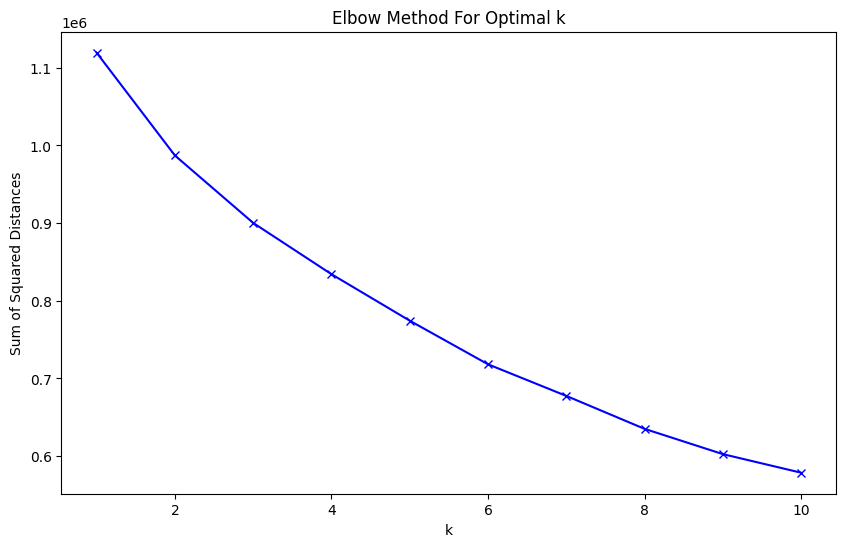

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Checking for missing values in the remaining numerical columns
missing_values = diabetes_data[numerical_cols].isnull().sum()

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(diabetes_data[numerical_cols])

# Applying k-means clustering for different values of k and calculating sum of squared distances
sum_of_squared_distances = []
K = range(1,11)  # Trying k from 1 to 10
for k in K:
    km = KMeans(n_clusters=k,  random_state=0)
    km = km.fit(scaled_data)
    sum_of_squared_distances.append(km.inertia_)

# Plotting the sum of squared distances for each k to observe the elbow point
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

C:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_35928\1339131185.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_data['Cluster'] = cluster_labels


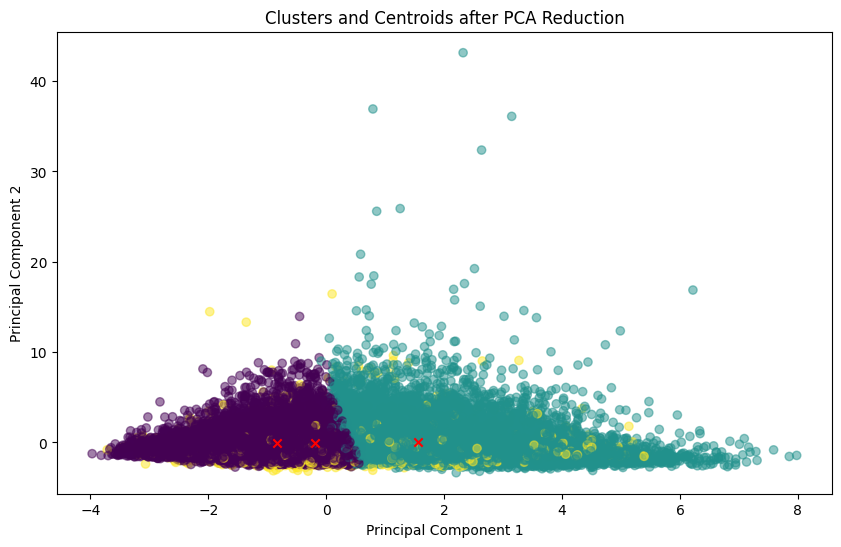

In [34]:
# Performing k-means clustering using the optimal k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(scaled_data)

# Extracting cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Adding cluster labels to the original dataframe for visualization
diabetes_data['Cluster'] = cluster_labels

# Visualizing the clusters along with centroids in a 2D plot
# Since we have multiple dimensions, we will use PCA to reduce it to 2 dimensions for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=diabetes_data['Cluster'], cmap='viridis', marker='o', alpha=0.5)

# Plotting the centroids
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x')

plt.title('Clusters and Centroids after PCA Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()